# Домашняя работа №1

In [93]:
import numpy as np
import pylab as pl
import pandas as pd
import warnings
import math

from matplotlib import pyplot as plt
from scipy import linalg


warnings.filterwarnings("ignore")

## Задание 1

Изобразите с помощью matplotlib. Изобразите точку x + 2y + 3z. Найдите угол между векторами x, y и x, z. 

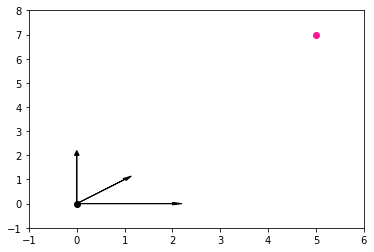

In [91]:
x = np.array([1,1])
y = np.array([2, 0])
z = np.array([0,2])

dot_ = x + 2*y + 3*z
ax = plt.axes()

plt.plot(0,0,'ok')
plt.xlim( [-1, 6] )
plt.ylim( [-1, 8] )
# plt.grid(b=True, which='major')
ax.arrow( 0, 0, x[0], x[1], head_width=0.1, head_length=0.2, fc='k', ec='k' )
ax.arrow( 0, 0, y[0], y[1], head_width=0.1, head_length=0.2, fc='k', ec='k' )
ax.arrow( 0, 0, z[0], z[1], head_width=0.1, head_length=0.2, fc='k', ec='k' )
ax.scatter(dot_[0], dot_[1], c = 'deeppink') 

plt.show()



In [84]:
x + 2*y + 3*z

array([5, 7])

In [70]:
def cosine( a, b ):
    """
    Подсчет косинуса угла между векторами a, b по их координатам
    """
    
    # длины векторов
    aLength = np.linalg.norm( a )
    bLength = np.linalg.norm( b )
    
    return np.dot( a, b ) / ( aLength * bLength )

In [71]:
cosine( x, y )

0.7071067811865475

In [72]:
cosine( x, z )

0.7071067811865475

## Задание 2

Загрузите модель человека. Найдите расстояние от правой кисти до позвоночника

In [97]:
ns = ['type', 'x', 'y', 'z']
# read points for joints
dfJointsVertexes = pd.read_csv('data/joints.txt', sep=' ', names = ns)
axis_sort = 'x' 
df = dfJointsVertexes.sort_values(by=[axis_sort])

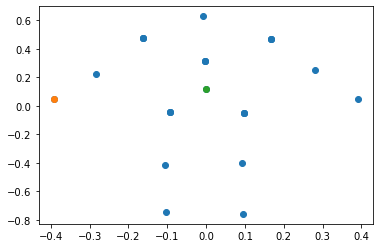

In [98]:
plt.scatter(df.x, df.y)

plt.scatter(df.x[21], df.y[21])

plt.scatter(df.x[0], df.y[0])

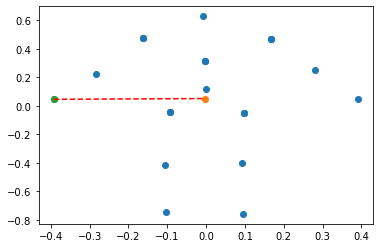

In [99]:
# вектор v - вектор позвоночника (составлен как разность одного вектора из другого)
v = np.array([df.x[9] - df.x[11], df.y[9] - df.y[11]])
# вектор w - вектор плеча
w = np.array([df.x[21],df.y[21]])

# строим проекцию данной точки w на вектор v: cv
cv = np.array(df.x[9], df.y[9]) + (np.dot(w,v))/np.dot(v,np.transpose(v))*v

# линия между v и cv
plt.plot([w[0],cv[0]],[w[1],cv[1]],'r--',linewidth=1.5)
plt.scatter(df.x, df.y)
plt.scatter(cv[0], cv[1])
plt.scatter(w[0], w[1])
# plt.legend(['проекция', 'cv - точка проекции', 'w - точка плеча'])

In [17]:
print(f"Расстояние от правой кисти до позвоночника: {linalg.norm(cv - w)}")

Расстояние от правой кисти до позвоночника: 0.38940416891982127


In [ ]:
# А ближайшее расстояние, разве не к точке 0,0?

# Задание 3

Найдите собственные значения и собственные вектора матриц (необходимо решение на numpy). Для матрицы 3x3 можно посмотреть на корни характеристического многочлена, посчитанные в numpy.

In [20]:
m1 = np.array([[2, 2],
               [1, 3]])

m2 = np.array([[4, 1, -1],
               [1, 4, -1],
               [-1, -1, 4]])

In [21]:
from numpy import linalg as LA

In [22]:
e_vals, e_vecs = LA.eig(m1)
print('Исходная матрица: \n', m1)

print('Собственные вектора: \n', e_vecs)
print('Собственные значения: ', e_vals)

Исходная матрица: 
 [[2 2]
 [1 3]]
Собственные вектора: 
 [[-0.89442719 -0.70710678]
 [ 0.4472136  -0.70710678]]
Собственные значения:  [1. 4.]


In [23]:
e_vals, e_vecs = LA.eig(m2)
print('Исходная матрица: \n', m2)

print('Собственные вектора: \n', e_vecs)
print('Собственные значения: ', e_vals)

Исходная матрица: 
 [[ 4  1 -1]
 [ 1  4 -1]
 [-1 -1  4]]
Собственные вектора: 
 [[-0.81649658  0.57735027 -0.27658128]
 [ 0.40824829  0.57735027  0.8035929 ]
 [-0.40824829 -0.57735027  0.52701162]]
Собственные значения:  [3. 6. 3.]
